# Support Vector Machines Notebook
-----
In this notebook, we will focus only on using SVM in classification.

We will once use a Social_Network_Ads.csv data in [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), which performs linear SVM on the data.

And then use concentric.csv dataset in non-linear [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) using different kernels and compare between them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## Part One: Linear SVM
----
using Social_Network_Ads.csv dataset

![svm2 image](images/svm2.png)

In [2]:
df = pd.read_csv('Data/Social_Network_Ads.csv')
X = df.loc[:, 'Age':'EstimatedSalary']
y = df['Purchased']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train = y_train.values
y_test = y_test.values

(320, 2) (320,)
(80, 2) (80,)


In [5]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

In [6]:
linear_svc = LinearSVC()
linear_svc = linear_svc.fit(X_train, y_train)

In [7]:
y_pred = linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = %.2f%%' % (accuracy * 100))

Accuracy = 92.50%


In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


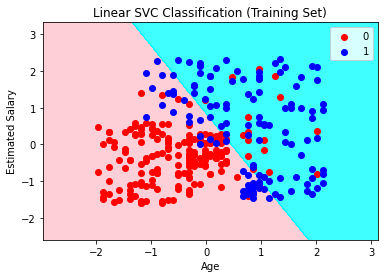

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, linear_svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Linear SVC Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


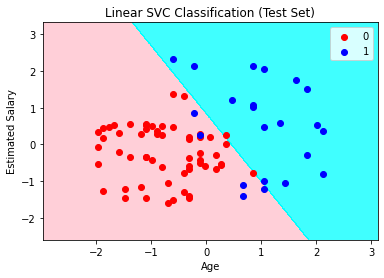

In [10]:
X_set, y_set= X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, linear_svc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 

plt.title('Linear SVC Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Part Two: Non-linear SVM
-----
using concentric.csv dataset

![svm image](images/svm.png)

In [11]:
df = pd.read_csv('Data/concentric.csv')
X = df[['X1', 'X2']].to_numpy()
y = df['y']

## Visualizing Data

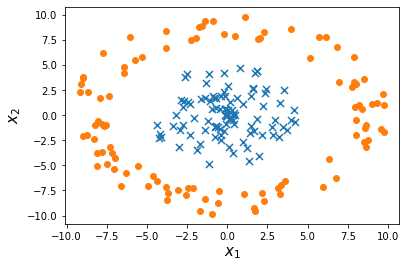

In [12]:
plt.scatter(X[0:100,0], X[0:100,1], s=50, marker="x")
plt.scatter(X[100:,0], X[100:,1])

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

plt.show()

In [13]:
X_3D = np.hstack((X[:,:], (np.power(X[:,0],2) + np.power(X[:,1],2)).reshape(X[:,:].shape[0],1)))
print(X_3D.shape)

(200, 3)


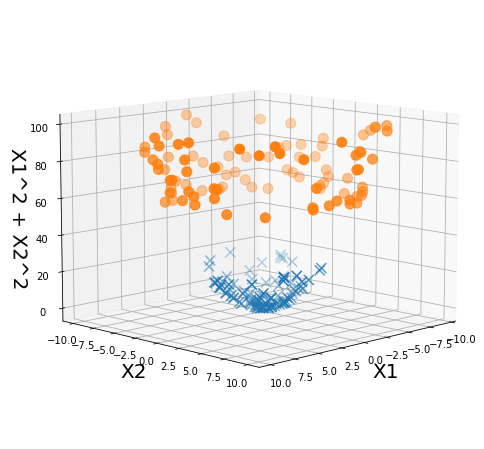

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# just to view the 3D plot from a specific angle
ax.view_init(elev=10, azim=45)

ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_zlabel('X1^2 + X2^2', fontsize=20)

ax.scatter(X_3D[0:100, 0], X_3D[0:100,1], X_3D[0:100,2], marker='x', s=100)
ax.scatter(X_3D[100:,0], X_3D[100:,1], X_3D[100:,2], s=100)

plt.show()

## Let's test training the model on the 3D Data

In [15]:
svc = SVC(kernel='linear')
svc = svc.fit(X_3D, y)

In [16]:
y_pred = svc.predict(X_3D)
accuracy = accuracy_score(y, y_pred)
print('Accuracy = %.2f%%' % (accuracy * 100))

Accuracy = 100.00%


### Extra cell to visualize the output

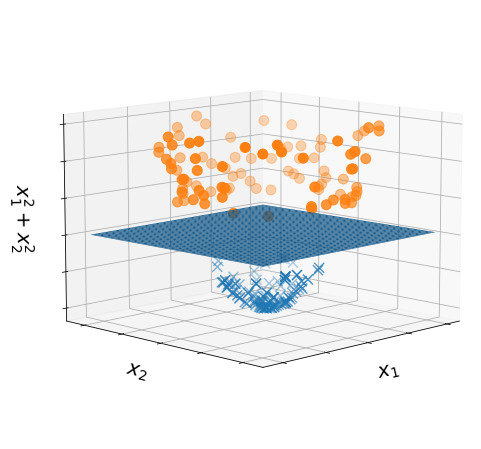

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.view_init(elev=10, azim=45)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_1^2+x_2^2$', fontsize=20)

ax.scatter(X_3D[:100,0], X_3D[:100,1], X_3D[:100,2], marker='x', s=100)
ax.scatter(X_3D[100:,0], X_3D[100:,1], X_3D[100:,2], s=100)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xp = np.linspace(xlim[0], xlim[1], 100)
yp = np.linspace(ylim[0], ylim[1], 100)
zp = np.linspace(0, xlim[1]**2+ylim[1]**2 , 100)

XP,YP = np.meshgrid(xp,yp)

Z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

ax.plot_surface(XP,YP, Z(XP,YP))

plt.show()

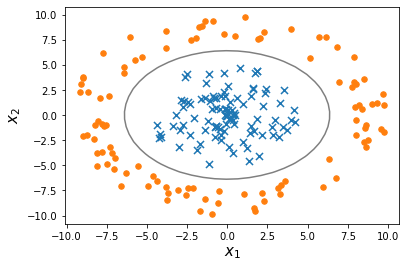

In [18]:
plt.scatter(X[:100, 0], X[:100, 1], s=50, marker="x")
plt.scatter(X[100:, 0], X[100:, 1], s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel(), (np.power(XX,2) + np.power(YY,2)).ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

plt.show()

## Now training the model on the real data

In [19]:
svc = SVC(kernel='rbf')
svc = svc.fit(X, y)

In [20]:
y_pred = svc.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy = %.2f%%' % (accuracy * 100))

Accuracy = 100.00%


## (EXTRA) Visualizing the SVM Model

In [21]:
def plot_SVM(X1, X2, model, support_vector=False, margin=False):
    plt.scatter(X1[:, 0], X1[:, 1], s=50, marker="x")
    plt.scatter(X2[:, 0], X2[:, 1], s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    if margin:
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                   linestyles=['-'])
    
    # plot support vectors
    if support_vector:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                   s=100, linewidth=1, 
                   facecolors='none', edgecolors='k')

    plt.xlabel('$x_1$', fontsize=15)
    plt.ylabel('$x_2$', fontsize=15)
    
    plt.show()

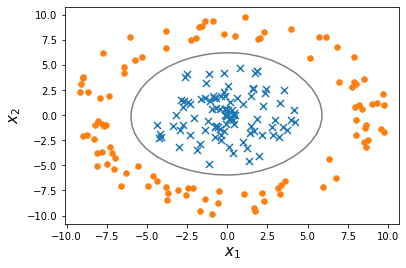

In [22]:
plot_SVM(X[0:100,], X[100:,], svc)